In [1]:
import torch
import torch.autograd.functional as F
import torch.distributions as dist

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Retina display
%config InlineBackend.figure_format = 'retina'

In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())
#plt.rcParams.update(bundles.icml2022())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

plt.rcParams['figure.dpi'] = 450


In [3]:
std_fev1= np.array([0.22039226, 0.15373536, 0.21177431, 0.21318844, 0.1987515 ,
       0.20611829, 0.18500841, 0.21216135, 0.19519949, 0.18260151,
       0.22640395, 0.17512567, 0.19628663, 0.20067075, 0.19125635,
       0.18179175, 0.20164017, 0.21242361, 0.1708406 , 0.20047132,
       0.17702935, 0.17521484, 0.17292091, 0.27706165, 0.19561483,
       0.1808169 , 0.20538744, 0.18568726, 0.20818192, 0.15762014,
       0.20347246, 0.20316188, 0.22285141])

std_fvc= np.array([0.25716267, 0.12156957, 0.23871146, 0.18068257, 0.25918061,
       0.29483894, 0.28844348, 0.25635076, 0.25785027, 0.1983748 ,
       0.24746464, 0.32951941, 0.28952375, 0.27443353, 0.25807896,
       0.25217397, 0.32901909, 0.33861483, 0.23829081, 0.2526945 ,
       0.25310717, 0.24156115, 0.25521136, 0.32652747, 0.25700848,
       0.31335603, 0.27248213, 0.29585341, 0.25851081, 0.18970026,
       0.21070937, 0.26939063, 0.22024841])

df = pd.DataFrame({r'Standard Deviation FEV$_1$': std_fev1, r'Standard Deviation FVC': std_fvc})



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Roboto Condensed
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found:

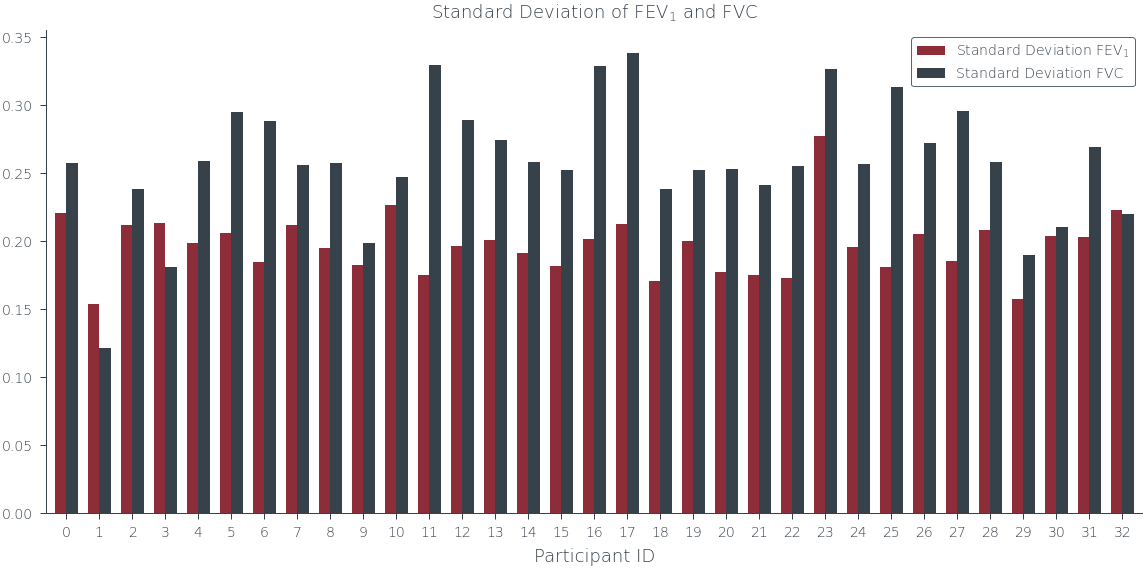

In [4]:
# large bar width
df.plot(kind='bar', rot=0, figsize=(8, 4), width=0.7)
plt.title('Standard Deviation of FEV$_1$ and FVC')
plt.xlabel("Participant ID")
plt.savefig('std.pdf', bbox_inches='tight', dpi=500)
plt.savefig('std.png', bbox_inches='tight')
plt.savefig('std.svg', bbox_inches='tight')

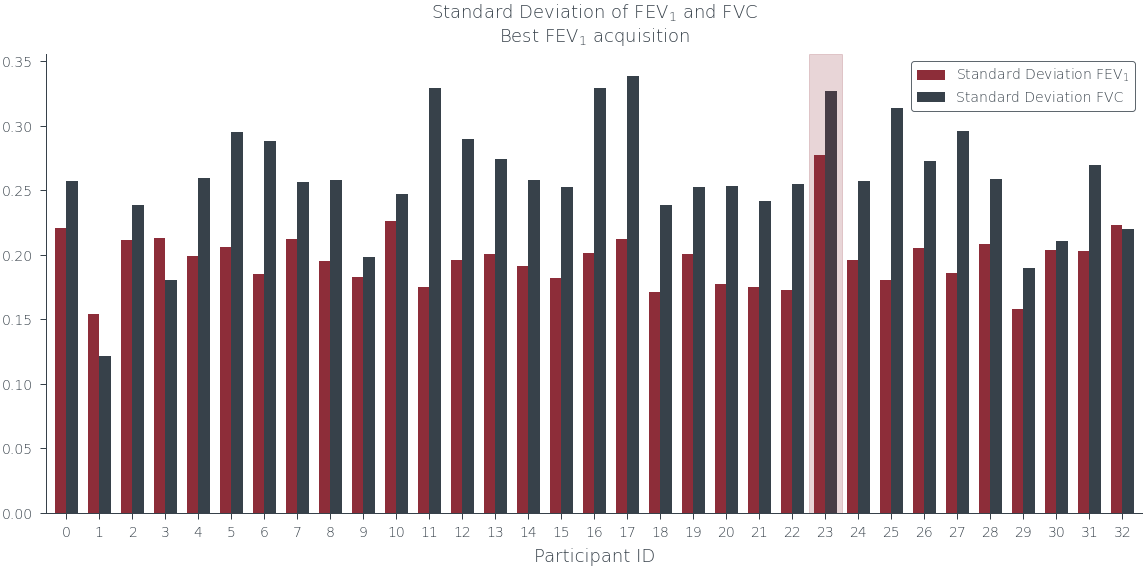

In [5]:
# Highlight the record with the highest score for FEV1 by adding a fillcolor rectangle covering the whole y-axis
df.plot(kind='bar', rot=0,  figsize=(8, 4), width=0.7)
plt.title('Standard Deviation of FEV$_1$ and FVC\nBest FEV$_1$ acquisition')
plt.xlabel("Participant ID")

best_fev1 = df[r'Standard Deviation FEV$_1$'].argmax()
plt.axvspan(best_fev1-0.5, best_fev1+0.5, color='C0', alpha=0.2)
plt.savefig('std_best_fev.pdf', bbox_inches='tight')
plt.savefig('std_best_fev.png', bbox_inches='tight')
plt.savefig('std_best_fev.svg', bbox_inches='tight')


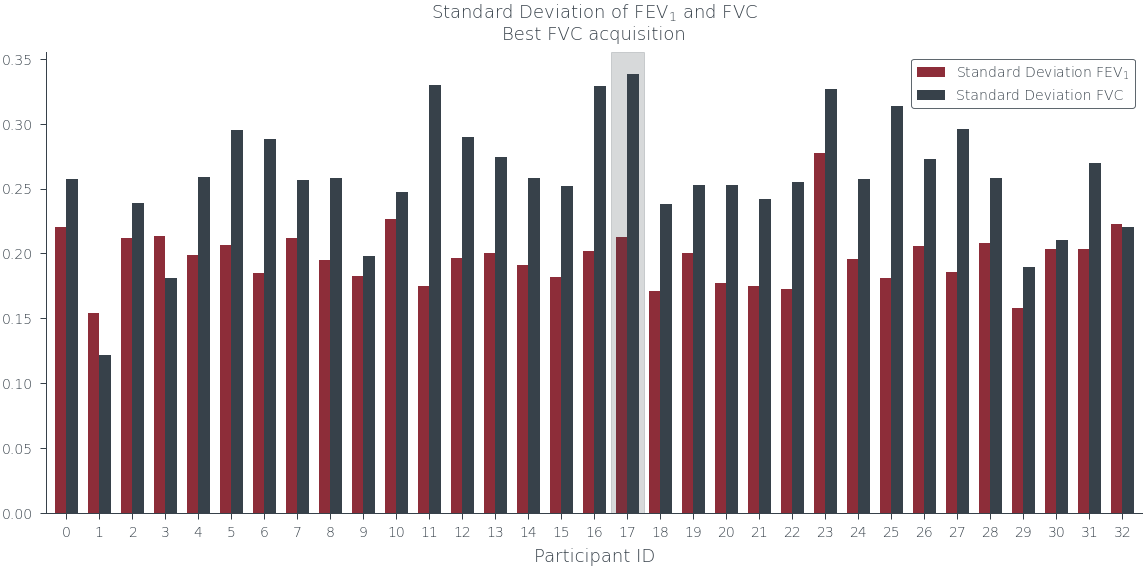

In [6]:
# Highlight the record with the highest score for FEV1 by adding a fillcolor rectangle covering the whole y-axis
df.plot(kind='bar', rot=0, figsize=(8, 4), width=0.7)
plt.xlabel("Participant ID")

plt.title('Standard Deviation of FEV$_1$ and FVC\nBest FVC acquisition')
best_fvc = df[r'Standard Deviation FVC'].argmax()
plt.axvspan(best_fvc-0.5, best_fvc+0.5, color='C1', alpha=0.2)
plt.savefig('std_best_fvc.pdf', bbox_inches='tight')
plt.savefig('std_best_fvc.png', bbox_inches='tight')
plt.savefig('std_best_fvc.svg', bbox_inches='tight')


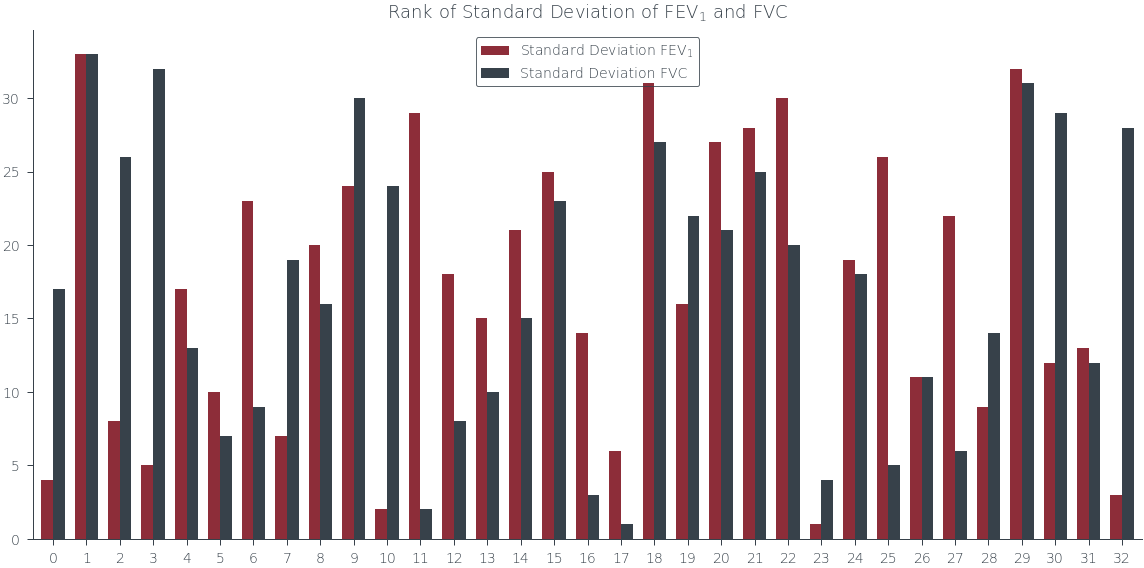

In [7]:
# Convert to ranks of the standard deviation for FEV1 and FVC
df_r = df.rank(axis=0, ascending=False)
df_r.plot(kind='bar', rot=0, figsize=(8, 4), width=0.7)
plt.title('Rank of Standard Deviation of FEV$_1$ and FVC')
plt.savefig('std_rank.pdf', bbox_inches='tight')
plt.savefig('std_rank.png', bbox_inches='tight')
plt.savefig('std_rank.svg', bbox_inches='tight')

In [8]:
df_r

,Standard Deviation FEV$_1$,Standard Deviation FVC
0,4.0,17.0
1,33.0,33.0
2,8.0,26.0
3,5.0,32.0
4,17.0,13.0
5,10.0,7.0
6,23.0,9.0
7,7.0,19.0
8,20.0,16.0
9,24.0,30.0


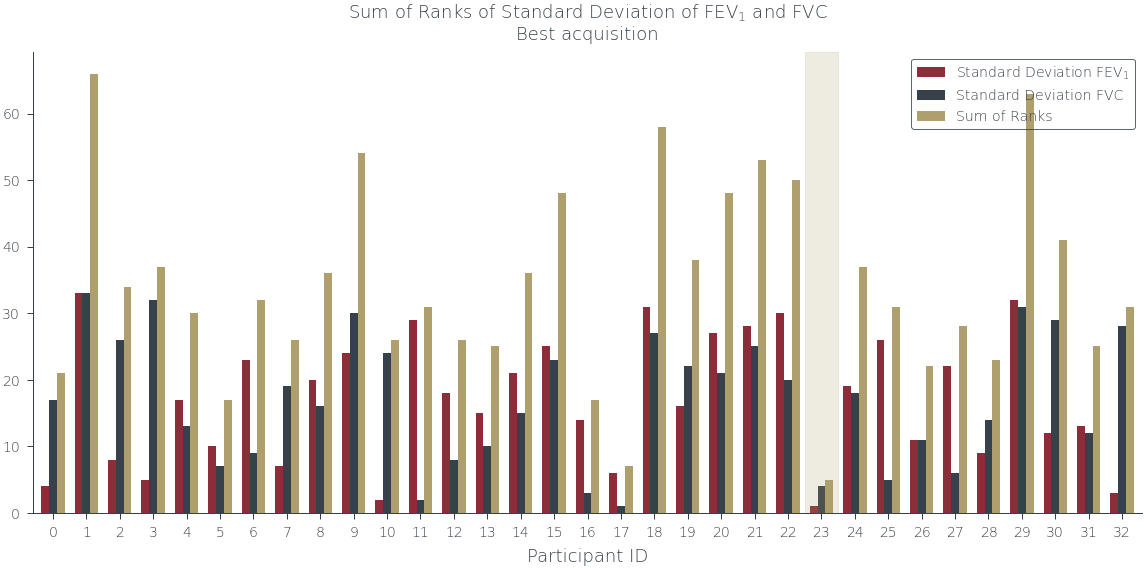

In [9]:
# Sum of ranks
df_r['Sum of Ranks'] = df_r.sum(axis=1)
df_r.plot(kind='bar', rot=0, figsize=(8, 4), width=0.7)
plt.xlabel("Participant ID")

# Highlight the record with the lowest score for rank sum by adding a fillcolor rectangle covering the whole y-axis
best_sum = df_r['Sum of Ranks'].argmin()
plt.title('Sum of Ranks of Standard Deviation of FEV$_1$ and FVC\nBest acquisition')
plt.axvspan(best_sum-0.5, best_sum+0.5, color='C2', alpha=0.2)
plt.savefig('std_rank_sum.pdf', bbox_inches='tight')
plt.savefig('std_rank_sum.png', bbox_inches='tight')
plt.savefig('std_rank_sum.svg', bbox_inches='tight')

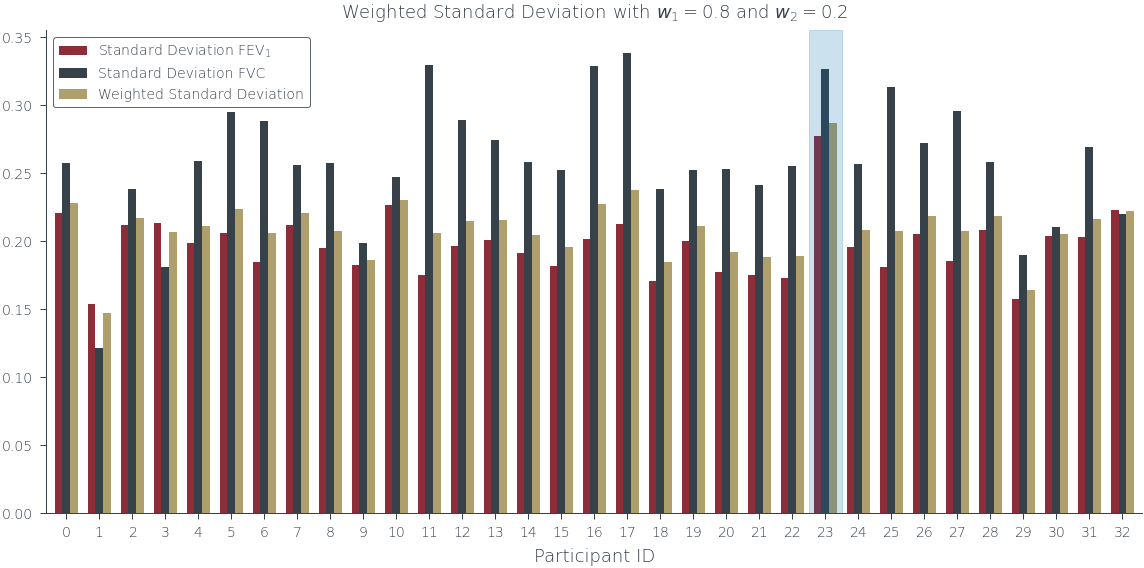

In [10]:
# Weight the uncertainty of FEV1 and FVC by w1 and w2, respectively and add them up 

w1 = 0.8
w2 = 0.2

df_w = df.copy()
df_w[r'Weighted Standard Deviation'] = w1*df[r'Standard Deviation FEV$_1$'] + w2*df[r'Standard Deviation FVC']
df_w.plot(kind='bar', rot=0, figsize=(8, 4), width=0.7)
plt.xlabel("Participant ID")


# Highlight the record with the lowest score for weighted standard deviation by adding a fillcolor rectangle covering the whole y-axis
best_w = df_w[r'Weighted Standard Deviation'].argmax()
plt.axvspan(best_w-0.5, best_w+0.5, color='C3', alpha=0.2)

plt.title(r'Weighted Standard Deviation with $w_1 = 0.8$ and $w_2 = 0.2$')
plt.savefig('std_weighted.pdf', bbox_inches='tight')
plt.savefig('std_weighted.png', bbox_inches='tight')
plt.savefig('std_weighted.svg', bbox_inches='tight')
